In [211]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
from collections import OrderedDict

In [207]:
# Import Top Album Sales data from Excel sheets
gaon = ExcelFile('gaon_yearly.xlsx')

# Import all sheets
ga1 = pd.read_excel(gaon, sheet_name=None)
#ga1.keys()

gaon_tots = []

# Preview data for 2010
for year in ga1.keys():
    gaon_tots.append(ga1[year]['Total sales'].sum())
    
gaon_tots_dict = dict(zip(ga1.keys(),gaon_tots))
gaon_tots_dict['2018'] = gaon_tots_dict['2018(OCT)']
del gaon_tots_dict['2018(OCT)']
gaon_tots_dict

{'2010': 1373419,
 '2011': 1953124,
 '2012': 1988096,
 '2013': 2365152,
 '2014': 1995534,
 '2015': 2524901,
 '2016': 3794433,
 '2017': 6629910,
 '2018': 7411438}

In [196]:
# Import csv data for Economic, Demographic indicators
kpis = pd.read_csv('sk_kpis.csv', skipinitialspace=True)

# Filter data for South Korea
sk_kpis = kpis.loc[kpis['Code'] == 'KOR']

# Check for columns will missing values
allnull_columns = sk_kpis.columns[sk_kpis.isnull().all()]
#print(allnull_columns)
del sk_kpis['Literacy rate']

#allnull_columns = sk_kpis.columns[sk_kpis.isnull().all()]
#allnull_columns
#anynull_columns = sk_kpis.columns[sk_kpis.isnull().any()]
#anynull_columns

# Fill missing values with forward fill
sk_kpis.fillna(method='pad', inplace=True)
sk_kpis = sk_kpis.set_index('Year')
sk_kpis['Album Sales'] = np.nan

# Convert index to string for merge
sk_kpis.index = sk_kpis.index.map(str)

# Merge the Total Annual Album Sales and other KPI's
for key, value in gaon_tots_dict.items():
    sk_kpis.at[key, 'Album Sales'] = value
sk_kpis

sk_kpis.index = pd.to_datetime(sk_kpis.index)
sk_kpis

,Country,Code,Economic growth,Government debt,Unemployment rate,Life expectancy,Internet users,Government spending percent of GDP,Human development,Education spending percent of GDP,Homicide rate,GDP per capita current dollars,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,Happiness index,Internet bandwidth,Suicides,Album Sales
Year,,,,,,,,,,,,,,,,,,,,
2009-01-01,South Korea,KOR,0.71,NaN,3.64,79.97,81.60,15.17,NaN,4.67,NaN,18291.92,0.72,1.51,2.76,2.53,NaN,NaN,NaN,NaN
2010-01-01,South Korea,KOR,6.50,NaN,3.72,80.12,83.70,14.47,0.882,4.67,NaN,22086.95,0.72,1.67,2.92,2.81,NaN,NaN,34.1,1373419.0
2011-01-01,South Korea,KOR,3.68,NaN,3.41,80.57,83.76,14.59,0.886,4.67,0.9,24079.79,0.72,1.66,3.05,3.04,NaN,NaN,34.1,1953124.0
2012-01-01,South Korea,KOR,2.29,33.88,3.22,80.82,84.07,14.83,0.888,4.62,0.8,24358.78,0.71,1.65,3.08,3.01,NaN,11.88,34.1,1988096.0
2013-01-01,South Korea,KOR,2.90,36.67,3.12,81.27,84.77,15.00,0.891,4.93,0.7,25890.02,0.71,1.71,3.06,2.86,6.27,17.17,34.1,2365152.0
2014-01-01,South Korea,KOR,3.34,38.39,3.53,81.72,87.56,15.12,0.898,5.06,0.7,27811.37,0.70,1.80,3.03,2.78,6.27,25.82,34.1,1995534.0
2015-01-01,South Korea,KOR,2.79,39.74,3.63,82.02,89.90,15.01,0.898,5.07,0.7,27105.08,0.70,1.88,3.02,2.62,5.98,30.31,28.3,2524901.0
2016-01-01,South Korea,KOR,2.93,40.36,3.71,82.02,92.84,15.18,0.900,5.07,0.7,27608.25,0.69,1.89,2.94,2.52,5.84,45.18,26.9,3794433.0
2017-01-01,South Korea,KOR,3.06,40.36,3.73,82.02,95.10,15.33,0.903,5.07,0.7,29742.84,0.69,1.89,2.94,2.52,5.84,45.18,26.9,6629910.0


In [197]:
print(sk_kpis.keys())
data1 = sk_kpis.loc[:,'Economic growth':]
print(len(data1.keys()))
plots1 = data1.iloc[:,0:3].join(data.iloc[:,-1:])
plots2 = data1.iloc[:,3:6].join(data.iloc[:,-1:])
plots3 = data1.iloc[:,6:9].join(data.iloc[:,-1:])
plots4 = data1.iloc[:,9:12].join(data.iloc[:,-1:])
plots5 = data1.iloc[:,12:15].join(data.iloc[:,-1:])
plots6 = data1.iloc[:,15:]

happy_data = data1.loc[:,['Happiness index','Album Sales']]
plots1

Index(['Country', 'Code', 'Economic growth', 'Government debt',
       'Unemployment rate', 'Life expectancy', 'Internet users',
       'Government spending percent of GDP', 'Human development',
       'Education spending percent of GDP', 'Homicide rate',
       'GDP per capita current dollars', 'Percent of world population',
       'Percent of world GDP', 'Percent of world exports ',
       'Percent of world imports', 'Happiness index', 'Internet bandwidth',
       'Suicides', 'Album Sales'],
      dtype='object')
18


,Economic growth,Government debt,Unemployment rate,Album Sales
Year,,,,
2009-01-01,0.71,NaN,3.64,NaN
2010-01-01,6.50,NaN,3.72,1373419.0
2011-01-01,3.68,NaN,3.41,1953124.0
2012-01-01,2.29,33.88,3.22,1988096.0
2013-01-01,2.90,36.67,3.12,2365152.0
2014-01-01,3.34,38.39,3.53,1995534.0
2015-01-01,2.79,39.74,3.63,2524901.0
2016-01-01,2.93,40.36,3.71,3794433.0
2017-01-01,3.06,40.36,3.73,6629910.0


<Figure size 432x288 with 0 Axes>

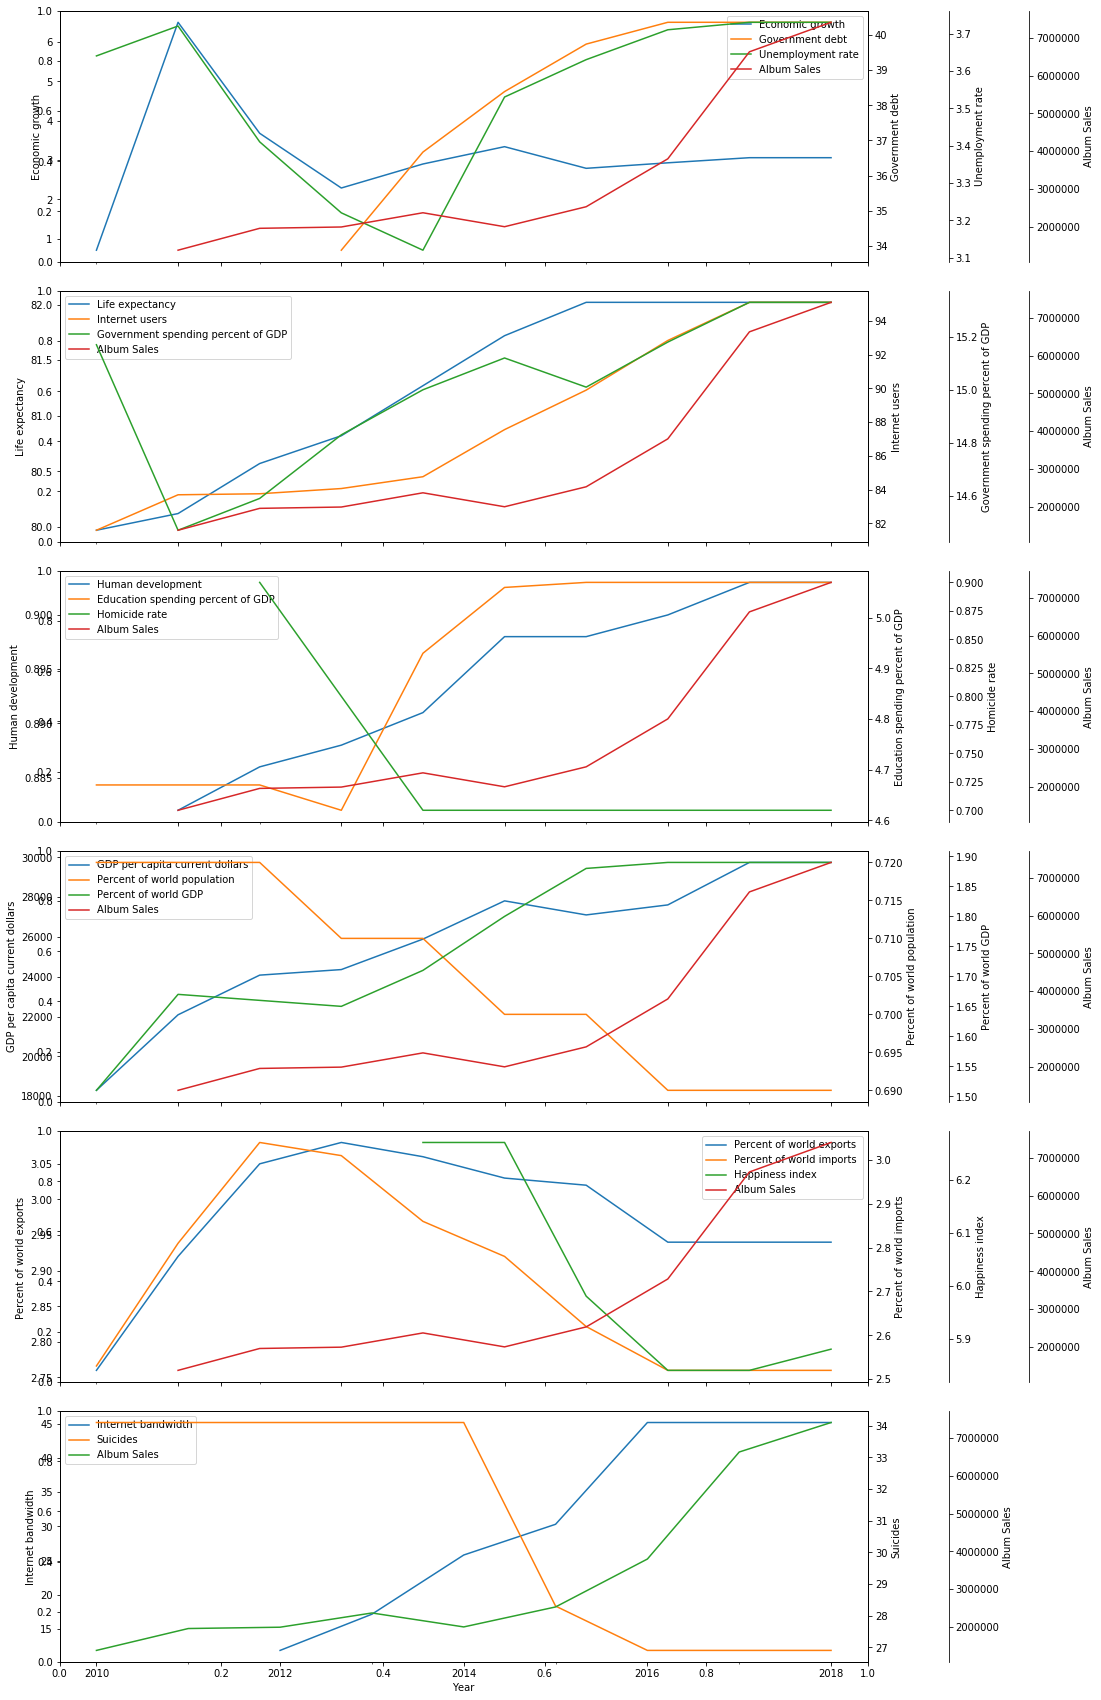

In [198]:
fig = plt.figure()
fig, axes = plt.subplots(nrows=6, figsize=(16, 24), sharex=True)

fig.add_subplot(611)
plot_multi(plots1)
fig.add_subplot(612)
plot_multi(plots2)
fig.add_subplot(613)
plot_multi(plots3)
fig.add_subplot(614)
plot_multi(plots4)
fig.add_subplot(615)
plot_multi(plots5)
fig.add_subplot(616)
plot_multi(plots6)


plt.tight_layout()
plt.show()

In [199]:
def plot_multi(data, cols=None, spacing=.1, **kwargs):

    from pandas import plotting

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = getattr(getattr(plotting, '_style'), '_get_standard_colors')(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    #ax.set_xlabel('Year')
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)])
        ax_new.set_ylabel(ylabel=cols[n])

       # # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    return ax

,Happiness index,Album Sales
Year,,
2009-01-01,NaN,NaN
2010-01-01,NaN,1373419.0
2011-01-01,NaN,1953124.0
2012-01-01,NaN,1988096.0
2013-01-01,6.27,2365152.0
2014-01-01,6.27,1995534.0
2015-01-01,5.98,2524901.0
2016-01-01,5.84,3794433.0
2017-01-01,5.84,6629910.0


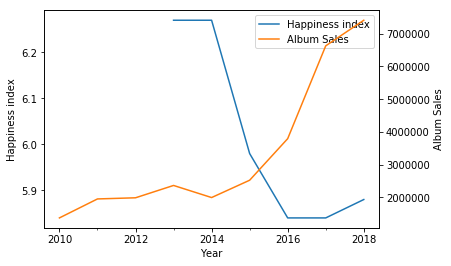

In [200]:
plot_multi(happy_data)
happy_data

In [201]:
# plots based on ranks

In [232]:
from itertools import chain
set(chain(*ga1.values()))

{'#', 'Album', 'Artist', 'Format', 'Label', 'Total sales'}

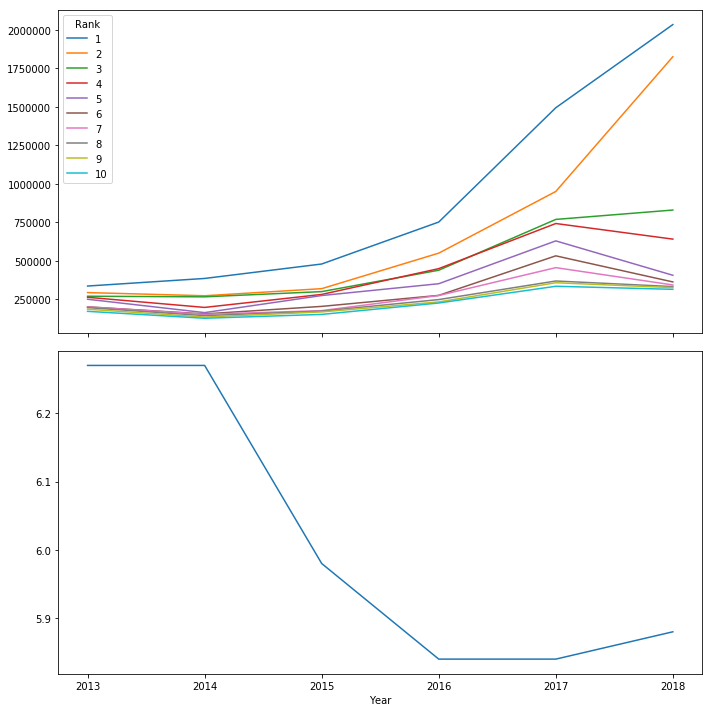

In [468]:
worksheets = ['2010','2011','2012','2013','2014','2015','2016','2017','2018(OCT)']
galist = [pd.read_excel('gaon_yearly.xlsx', sheet_name=i, usecols=[4]) for i in range(9)]
summed = pd.concat(galist, axis=1, keys=worksheets)
summed.index.name = 'Rank'
summed.set_index(summed.index + 1, inplace=True)
summed = summed.stack()
summed1 = summed.reset_index()
summed1 = summed1.set_index('Rank')
summed2 = summed1.iloc[:,1:]
summed2.columns.names = ['Year']
summed2
#summed = summed.index.names = ['Rank', 'Total sales']
#del summed['Rank']
summedt = summed2.T
summedt = summedt.rename({'2018(OCT)':'2018'})
summedt
summedt.index = pd.to_datetime(summedt.index)
summedt
ranked_happy_data = summedt.join(happy_data.iloc[:,0])
happy_only = happy_data.iloc[:,0]
fig, axes = plt.subplots(nrows=2, ncols=1, sharex = True, figsize=(10,10))

summedt.iloc[3:,:].plot(ax=axes[0])
happy_only.plot(ax=axes[1])
plt.tight_layout()
plt.show()